In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [2]:
target = 'f2'
target_name = 'Micro F2-Score'

In [3]:
output_dir = os.path.join('..', 'outputs', 'cnn-rnn')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimentos = ['base', 'crop1', 'blur_rain_ref_rot_crop1_randaug1_elastic1']
apellidos = ['_weighted_1']


# Armar diccionario de experimentos
for exp in experimentos:
    for apellido in apellidos:
        scores[exp + apellido] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for exp in experimentos:
        for apellido in apellidos:
            path_predicciones = os.path.join(output_dir, exp, f'{n}L{apellido}', 'metadata.csv')
            predicciones = pd.read_csv(path_predicciones, index_col = 0)
            score = float(predicciones.loc[[target]].values[0][0])
            #print(path_predicciones, score[0][0])
            scores[exp + apellido].append(score)
            

In [4]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 1000
plotter = KunischPlotter()

In [5]:
lista_valores = list(scores.values())
display(lista_valores)
print(np.average(lista_valores))

[[0.5022,
  0.3482,
  0.2488,
  0.241,
  0.1878,
  0.1859,
  0.1719,
  0.1416,
  0.1415,
  0.1481,
  0.1342,
  0.0652,
  0.0843],
 [0.5371,
  0.3748,
  0.2498,
  0.1912,
  0.1656,
  0.173,
  0.1544,
  0.171,
  0.1901,
  0.1839,
  0.0631,
  0.0334,
  0.0429],
 [0.0,
  0.0,
  0.0113,
  0.0,
  0.0318,
  0.0,
  0.0038,
  0.0084,
  0.0196,
  0.0254,
  0.0335,
  0.041,
  0.0727]]

0.13791025641025642


In [6]:
valores = lista_valores[0]
auc = 0
for i in range(len(valores)-1):
    score_init = valores[i]
    score_final = valores[i+1]
    low_score = min(score_init, score_final)
    high_score = max(score_init, score_final)
    rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
    triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
    auc += rectangulo + triangulo
auc


54.143150000000006

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:260: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


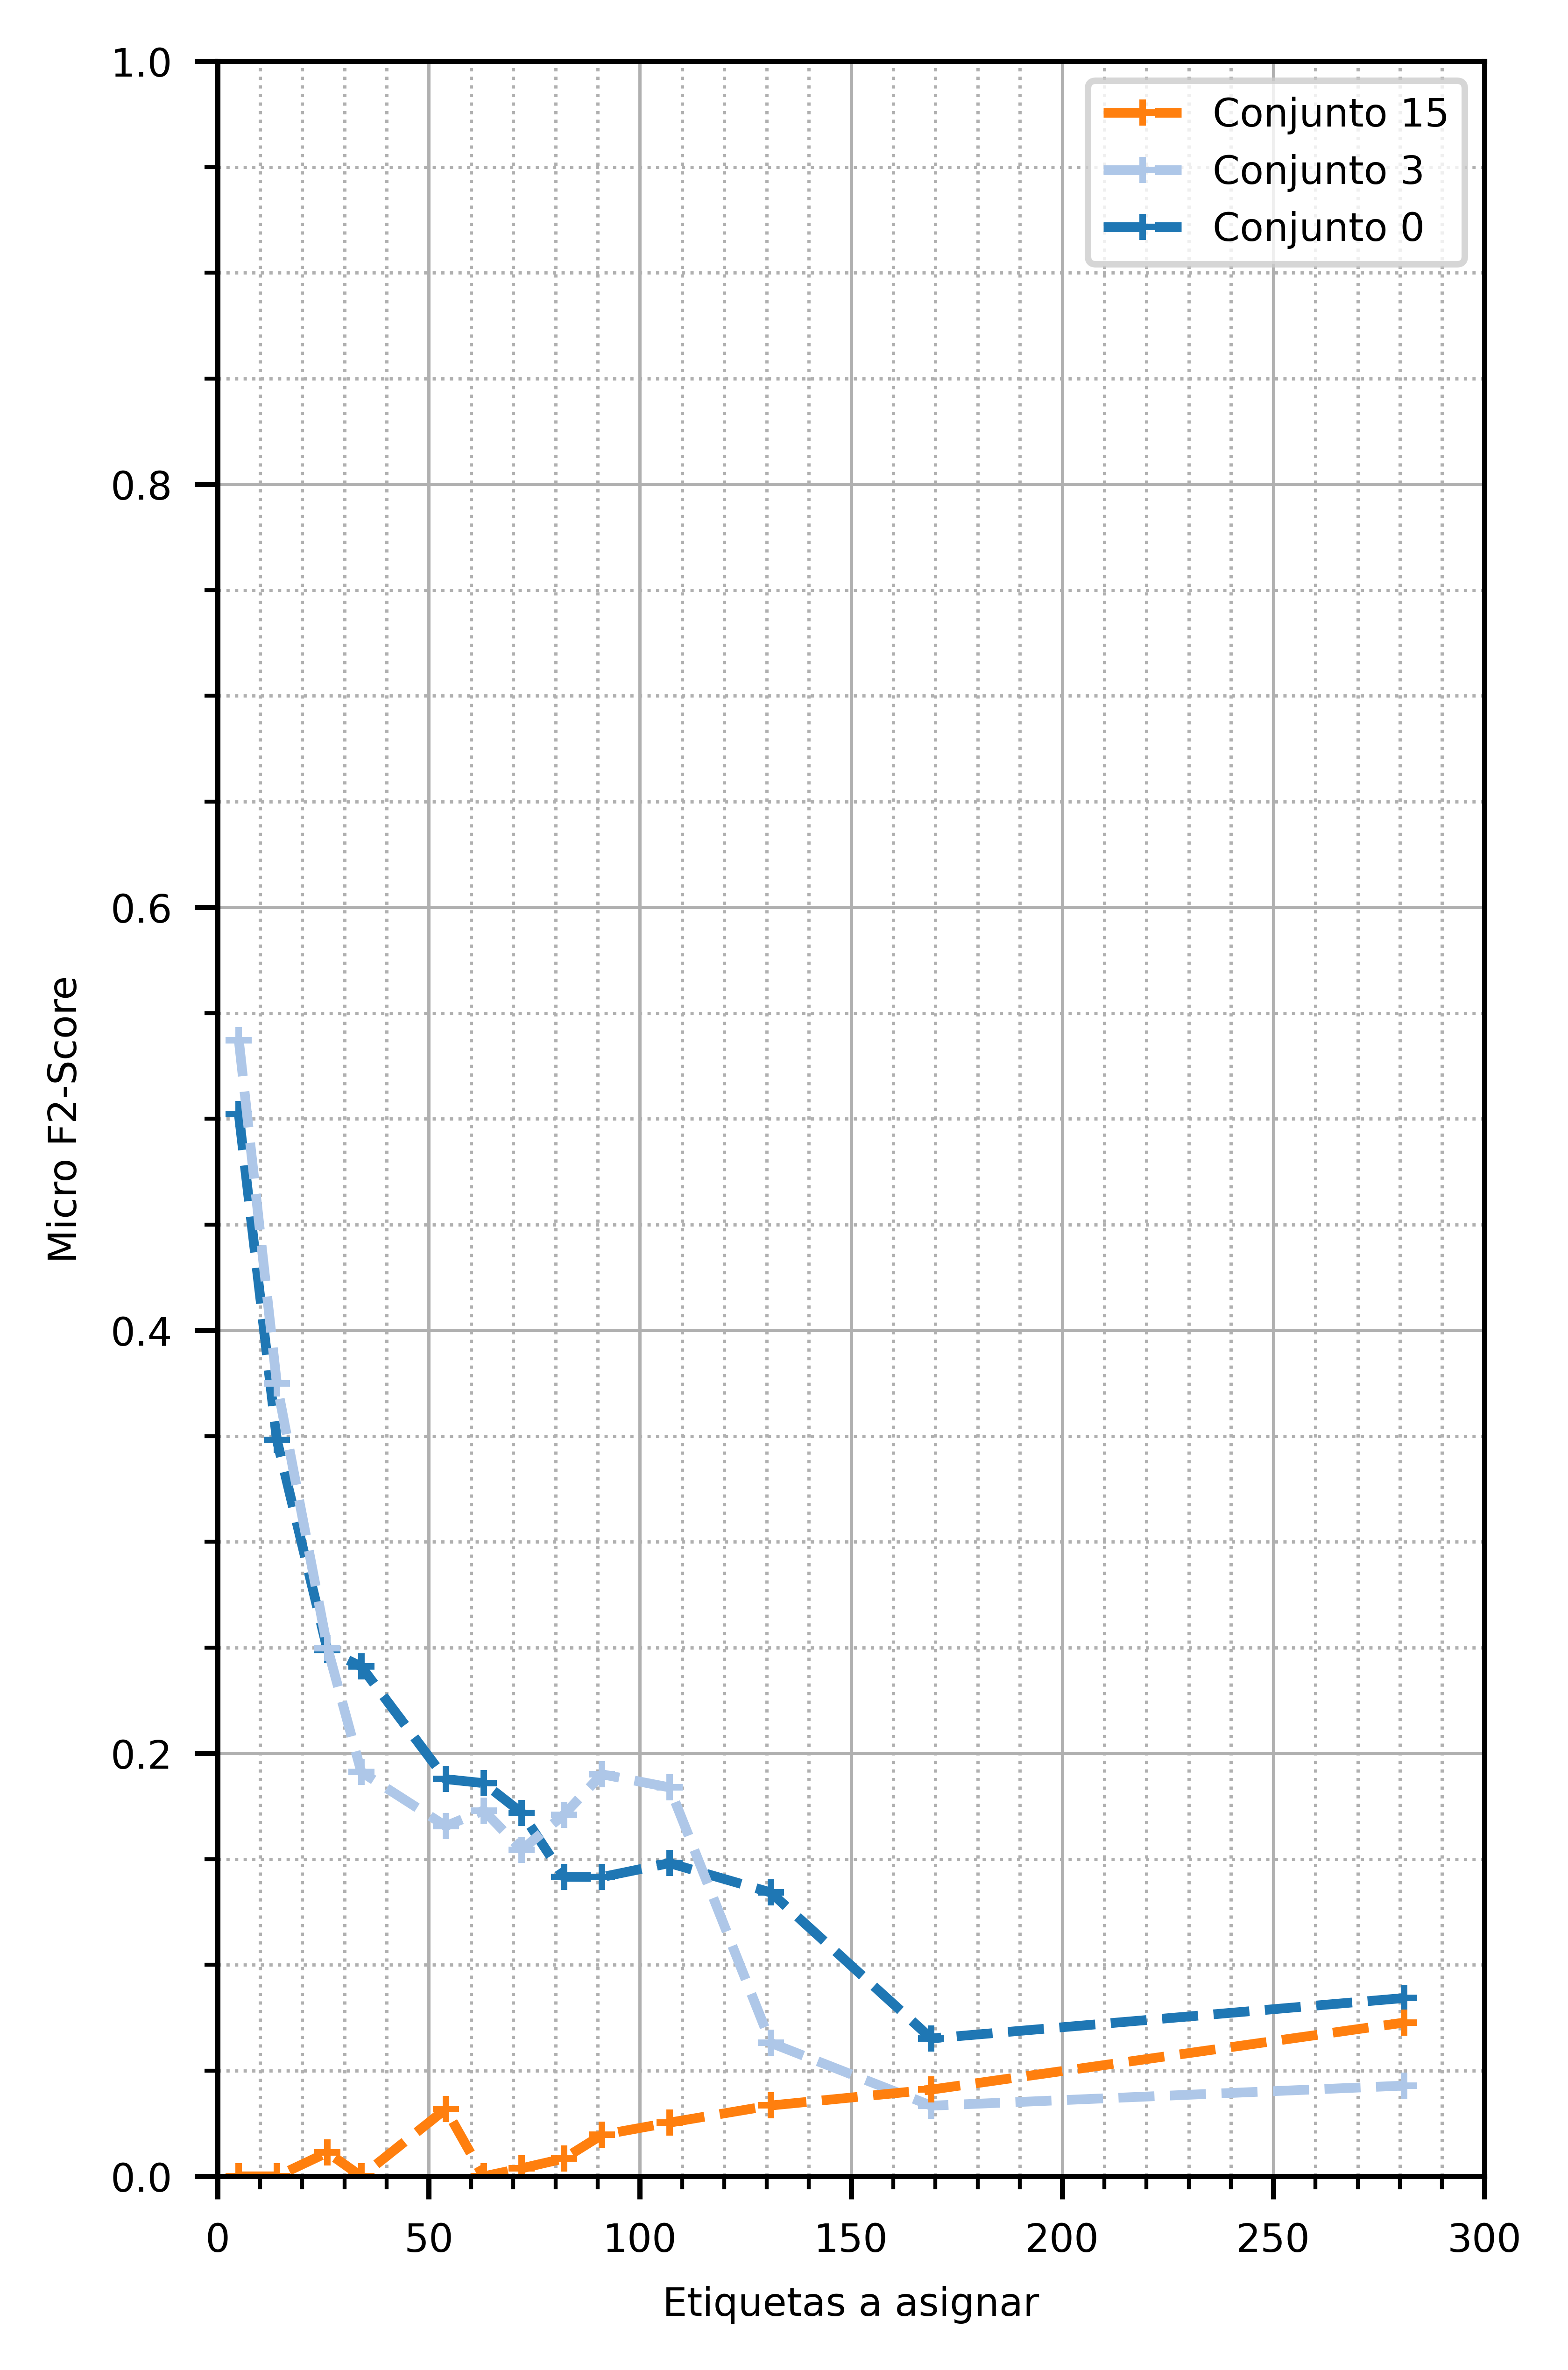

In [7]:
labels = ['Conjunto 0', 'Conjunto 3', 'Conjunto 15']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             #title = target_name + ' v/s Cantidad de Etiquetas',
             xlabel = "Etiquetas a asignar", ylabel = target_name,
             ylim = 1.0,
             xlim = 300,
            width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True,
             order = [2, 1, 0])

In [8]:
output_dir = os.path.join('..', 'outputs', 'cnn-rnn')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimento = 'base'
apellido = '_weighted_1'
targets = ['f2', 'recall', 'precision', 'hs']

# Armar diccionario de experimentos
for target in targets:
    scores[target] = []

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for target in targets:
        path_metadata = os.path.join(output_dir, experimento, f'{n}L{apellido}', 'metadata.csv')
        metadata = pd.read_csv(path_metadata, index_col = 0)
        score_n = float(metadata.loc[[target]].values[0][0])
        #print(path_predicciones, score[0][0])
        scores[target].append(score_n)

In [9]:
scores

{'f2': [0.5022,
  0.3482,
  0.2488,
  0.241,
  0.1878,
  0.1859,
  0.1719,
  0.1416,
  0.1415,
  0.1481,
  0.1342,
  0.0652,
  0.0843],
 'recall': [0.4905,
  0.332,
  0.2367,
  0.2331,
  0.1793,
  0.1752,
  0.1588,
  0.1325,
  0.135,
  0.1439,
  0.1316,
  0.063,
  0.0811],
 'precision': [0.5903,
  0.4633,
  0.3404,
  0.279,
  0.2337,
  0.246,
  0.258,
  0.1954,
  0.1832,
  0.1688,
  0.1482,
  0.0803,
  0.1015],
 'hs': [0.4657,
  0.2865,
  0.1917,
  0.1767,
  0.1308,
  0.1244,
  0.1216,
  0.099,
  0.0995,
  0.1005,
  0.0884,
  0.0446,
  0.057]}

In [10]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 1000
plotter = KunischPlotter()

D:\Escritorio\Semestre-envs\TesisMV\notebooks\utils.py:260: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


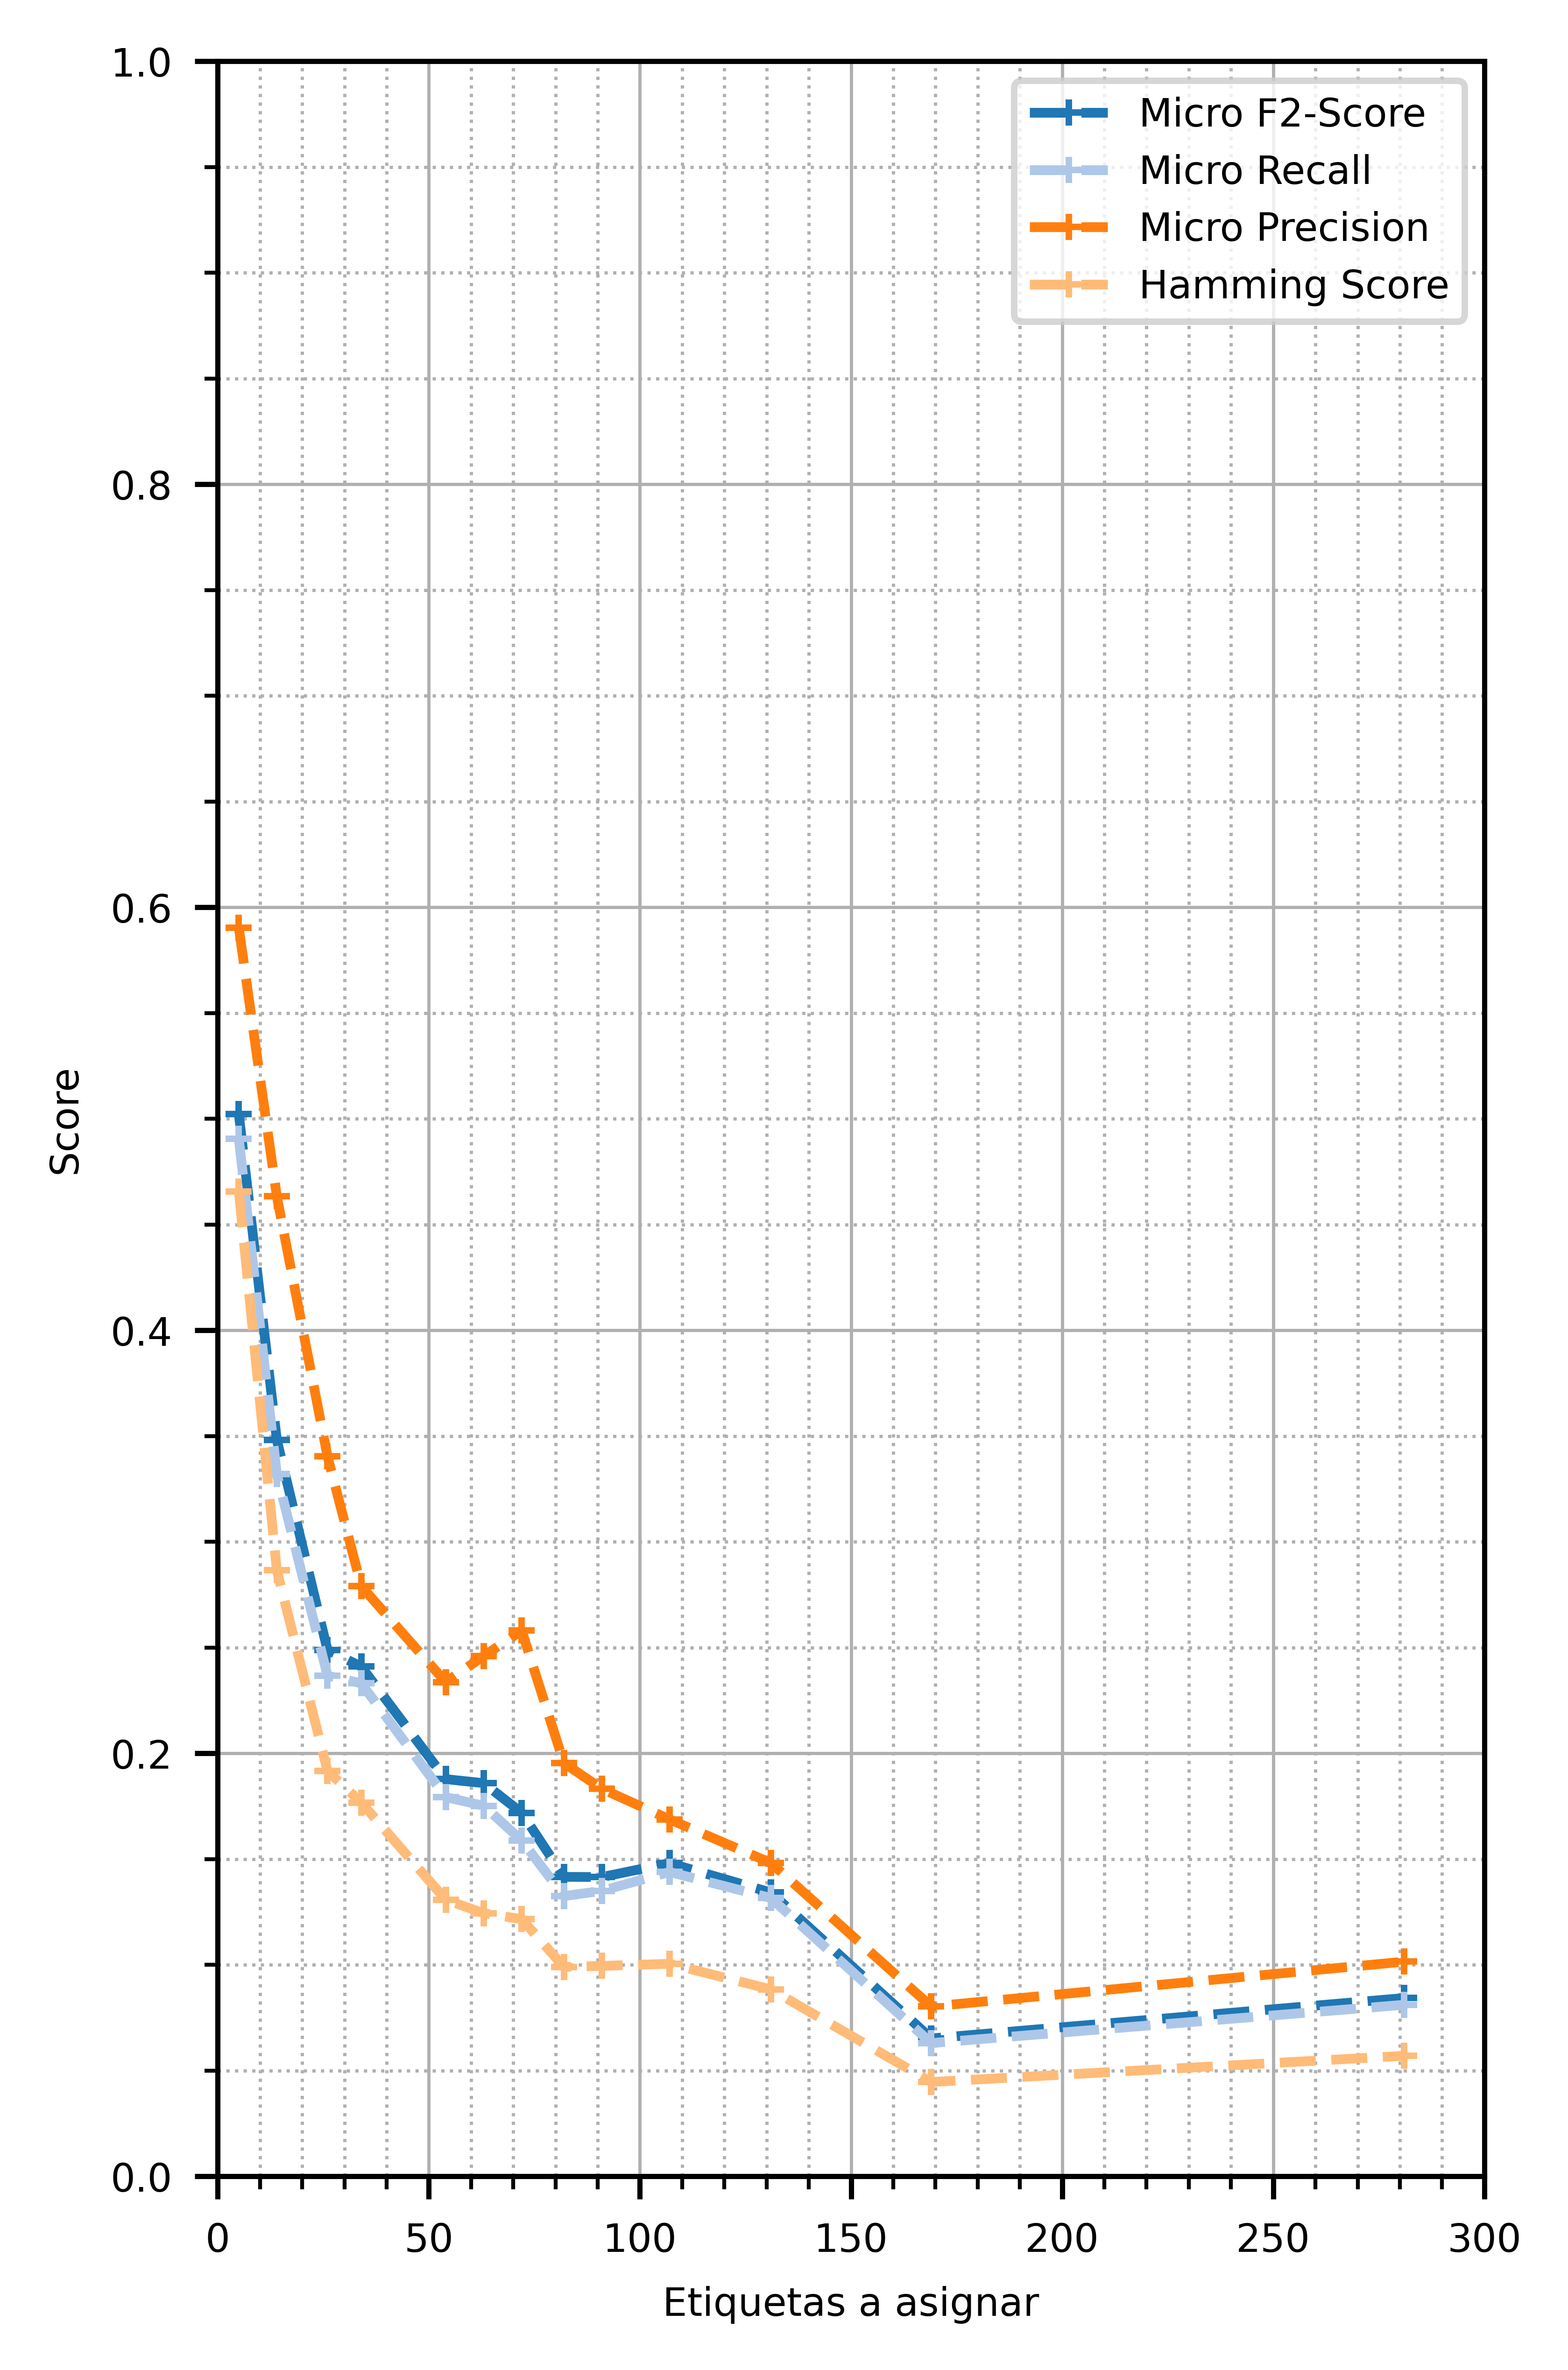

In [11]:
labels = ['Micro F2-Score', 'Micro Recall', 'Micro Precision', 'Hamming Score']
plotter.plot_results(nlabels,
             score = list(scores.values()),
             label = labels,
             #title = target_name + ' v/s Cantidad de Etiquetas',
             xlabel = "Etiquetas a asignar", ylabel = "Score",
             ylim = 1.0,
             xlim = 300,
             width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True,
             )

In [13]:
output_dir = os.path.join('..', 'outputs', 'cnn-rnn')

scores = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]
experimentos = ['base', 'crop1', 'blur_rain_ref_rot_crop1_randaug1_elastic1']
apellido = '_weighted_1'
targets = ['f2', 'recall', 'precision', 'hs', 'emr', 'mr5']

# Armar diccionario de experimentos
for n in nlabels:
    for exp in experimentos:
        scores[exp + ';' + str(n)] = {}

# Iterar sobre archivos de resultados sacando el target buscado
for n in nlabels:
    for experimento in experimentos:
        for target in targets:
            path_metadata = os.path.join(output_dir, experimento, f'{n}L{apellido}', 'metadata.csv')
            metadata = pd.read_csv(path_metadata, index_col = 0)
            score = float(metadata.loc[[target]].values[0][0])
            scores[experimento + ';' + str(n)][target] = score

da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop1': 3,
    'elastic1': 4,
    'rain': 5,
    'randaug1': 6,
    'gausblur1': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref_rot': 10,
    'rain_ref_rot': 11,
    'rain_ref_rot_elastic1': 12,
    'blur_rain_ref_rot_elastic1': 13,
    'blur_rain_ref_rot_crop1_elastic1': 14,
    'blur_rain_ref_rot_crop1_randaug1_elastic1': 15,
}

In [14]:
scores

{'base;5': {'f2': 0.5022,
  'recall': 0.4905,
  'precision': 0.5903,
  'hs': 0.4657,
  'emr': 0.3544,
  'mr5': 0.4601},
 'crop1;5': {'f2': 0.5371,
  'recall': 0.5145,
  'precision': 0.6656,
  'hs': 0.4894,
  'emr': 0.3879,
  'mr5': 0.4871},
 'blur_rain_ref_rot_crop1_randaug1_elastic1;5': {'f2': 0.0,
  'recall': 0.0,
  'precision': 0.0,
  'hs': 0.201,
  'emr': 0.201,
  'mr5': 0.201},
 'base;14': {'f2': 0.3482,
  'recall': 0.332,
  'precision': 0.4633,
  'hs': 0.2865,
  'emr': 0.107,
  'mr5': 0.2049},
 'crop1;14': {'f2': 0.3748,
  'recall': 0.3503,
  'precision': 0.5305,
  'hs': 0.3263,
  'emr': 0.1405,
  'mr5': 0.1894},
 'blur_rain_ref_rot_crop1_randaug1_elastic1;14': {'f2': 0.0,
  'recall': 0.0,
  'precision': 0.0,
  'hs': 0.058,
  'emr': 0.058,
  'mr5': 0.058},
 'base;26': {'f2': 0.2488,
  'recall': 0.2367,
  'precision': 0.3404,
  'hs': 0.1917,
  'emr': 0.0245,
  'mr5': 0.0851},
 'crop1;26': {'f2': 0.2498,
  'recall': 0.2386,
  'precision': 0.3101,
  'hs': 0.1877,
  'emr': 0.0426,
  

In [15]:
df = pd.DataFrame.from_dict(scores, orient='index')

In [16]:
df['etiquetas'] =[x.split(';')[1] for x in list(df.index.values)]
df['conjunto'] = [da_map[x.split(';')[0]] for x in list(df.index.values)]
df = df[['conjunto', 'etiquetas','f2', 'recall', 'precision', 'hs', 'emr', 'mr5']]
df

,conjunto,etiquetas,f2,recall,precision,hs,emr,mr5
base;5,0,5,0.5022,0.4905,0.5903,0.4657,0.3544,0.4601
crop1;5,3,5,0.5371,0.5145,0.6656,0.4894,0.3879,0.4871
blur_rain_ref_rot_crop1_randaug1_elastic1;5,15,5,0.0000,0.0000,0.0000,0.2010,0.2010,0.2010
base;14,0,14,0.3482,0.3320,0.4633,0.2865,0.1070,0.2049
crop1;14,3,14,0.3748,0.3503,0.5305,0.3263,0.1405,0.1894
blur_rain_ref_rot_crop1_randaug1_elastic1;14,15,14,0.0000,0.0000,0.0000,0.0580,0.0580,0.0580
base;26,0,26,0.2488,0.2367,0.3404,0.1917,0.0245,0.0851
crop1;26,3,26,0.2498,0.2386,0.3101,0.1877,0.0426,0.0928
blur_rain_ref_rot_crop1_randaug1_elastic1;26,15,26,0.0113,0.0092,0.1875,0.0309,0.0232,0.0232
base;34,0,34,0.2410,0.2331,0.2790,0.1767,0.0155,0.0619


In [17]:
df.to_csv("Experimento9.csv")